In [ ]:
import tensorflow as tf
from tensorflow.keras import backend, optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import BatchNormalization, Dropout, Flatten, Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

In [ ]:
import zipfile

local_zip = 'dataset1.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import os

base_dir = '/content/dataset1'
train_dir = os.path.join( base_dir, 'Training')
test_dir = os.path.join( base_dir, 'Testing')

In [ ]:
from keras.applications.mobilenet import preprocess_input

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255.,#preprocessing_function=preprocess_input,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale = 1./255.)#preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(96, 96),
    batch_size=32,
    color_mode='rgb',
    class_mode='sparse',
    shuffle=True,
    seed = 42
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(96, 96),
    batch_size=32,
    color_mode='rgb',
    class_mode='sparse',
    seed = 42
)

Found 281 images belonging to 5 classes.
Found 43 images belonging to 5 classes.


In [ ]:
label = {y:x for x,y in test_generator.class_indices.items()}
label

{0: 'Geblek Renteng', 1: 'Kawung', 2: 'Lereng', 3: 'Nitik', 4: 'Parang'}

In [ ]:
# Model Initialization

from keras.applications.mobilenet_v2 import MobileNetV2

base_model = MobileNetV2(input_shape=(96,96,3),
                               include_top=False)

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
model=Sequential()
model.add(base_model)
model.add(Dropout(0.5))
#model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(80, 80, 3)))
#model.add(tf.keras.layers.MaxPooling2D(2, 2))
#model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
#model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(len(label),activation='softmax'))

In [ ]:
opt=tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              optimizer=opt)

In [ ]:
earlystopping = EarlyStopping(monitor = 'val_accuracy', 
                              mode = 'max', 
                              patience = 10,
                              verbose = 1)

In [ ]:
# Model Fitting 
callback_list = [earlystopping]
model_history=model.fit(train_generator,
                        validation_data=test_generator,
                        epochs = 50,
                        shuffle=True,
                        #callbacks = callback_list,
                        verbose = 1)

Epoch 1/50
9/9 [==============================] - 4s 408ms/step - loss: 2.7201 - accuracy: 0.2740 - val_loss: 2.2525 - val_accuracy: 0.2326
Epoch 2/50
9/9 [==============================] - 2s 279ms/step - loss: 2.5757 - accuracy: 0.2918 - val_loss: 1.8443 - val_accuracy: 0.3023
Epoch 3/50
9/9 [==============================] - 2s 276ms/step - loss: 2.4034 - accuracy: 0.2776 - val_loss: 1.4987 - val_accuracy: 0.3721
Epoch 4/50
9/9 [==============================] - 2s 274ms/step - loss: 1.8682 - accuracy: 0.3808 - val_loss: 1.4408 - val_accuracy: 0.3721
Epoch 5/50
9/9 [==============================] - 3s 271ms/step - loss: 1.7532 - accuracy: 0.4235 - val_loss: 1.4129 - val_accuracy: 0.3721
Epoch 6/50
9/9 [==============================] - 3s 277ms/step - loss: 1.5512 - accuracy: 0.4626 - val_loss: 1.3922 - val_accuracy: 0.3953
Epoch 7/50
9/9 [==============================] - 3s 277ms/step - loss: 1.6491 - accuracy: 0.4662 - val_loss: 1.3437 - val_accuracy: 0.4186
Epoch 8/50
9/9 [====

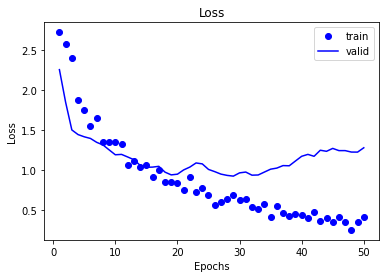

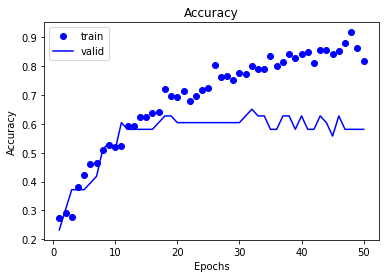

best val_acc: 0.6511628031730652 epoch: 31
best val_loss: 0.9212071895599365 epoch: 28


In [ ]:
history_dict = model_history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
acc_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]
epochs = range(1, len(history_dict["accuracy"]) + 1)

plt.plot(epochs, loss_values, "bo", label="train")
plt.plot(epochs, val_loss_values, "b", label="valid")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(epochs, acc_values, "bo", label="train")
plt.plot(epochs, val_acc_values, "b", label="valid")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

import numpy as np
print("best val_acc:", np.max(val_acc_values), "epoch:", np.argmax(val_acc_values))
print("best val_loss:", np.min(val_loss_values), "epoch:", np.argmin(val_loss_values))

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)

2/2 [==============================] - 0s 44ms/step - loss: 1.2757 - accuracy: 0.5814
Test Accuracy: 0.5813953280448914


In [ ]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=62)

  print(fn + "==>"+ label[np.argmax(classes)])

Saving 10-nitik-motif-batik-kawung.jpg to 10-nitik-motif-batik-kawung.jpg
Saving KP022.jpg to KP022.jpg
Saving KP023.jpg to KP023.jpg
Saving KP024.jpg to KP024.jpg
Saving KP029.jpg to KP029.jpg
Saving KP030.jpg to KP030.jpg
Saving YC004.jpg to YC004.jpg
Saving YC035.jpg to YC035.jpg
Saving YK048.jpg to YK048.jpg
Saving YT026.jpg to YT026.jpg
10-nitik-motif-batik-kawung.jpg==>Geblek Renteng
KP022.jpg==>Kawung
KP023.jpg==>Parang
KP024.jpg==>Lereng
KP029.jpg==>Kawung
KP030.jpg==>Kawung
YC004.jpg==>Kawung
YC035.jpg==>Kawung
YK048.jpg==>Parang
YT026.jpg==>Parang


In [ ]:
# Save as saved_model
model.save("saved_model/batik_model")

save_tflite_path = "./batik_model.tflite"

tf.compat.v1.enable_eager_execution()

# Weight Quantization - Input/Output=float32
converter = tf.lite.TFLiteConverter.from_saved_model('./saved_model/batik_model/')
converter.experimental_new_converter = True
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_quant_model = converter.convert()
with open(save_tflite_path, 'wb') as w:
    w.write(tflite_quant_model)
print("Weight Quantization complete! -", save_tflite_path)

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: saved_model/batik_model/assets
Weight Quantization complete! - ./batik_model.tflite


In [ ]:
tf.keras.models.save_model(model,'my_model.hdf5')

In [ ]:
model.save('my_model.h5')